In [107]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [108]:
import os
import numpy as np

from matplotlib import pyplot

from scipy import optimize

%matplotlib inline

In [109]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Leer el archivo CSV utilizando el delimitador adecuado (;)
df = pd.read_csv('/content/drive/MyDrive/primelParcial/data2/hotelprepa2.csv', delimiter=';')

# Manejar valores faltantes si los hay
df.dropna(inplace=True)  # Eliminar filas con valores faltantes, ajusta según tu caso

# Codificar las variables categóricas
label_encoders = {}
for column in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Cambiar el valor de la variable objetivo 'hotel'
df['hotel'] = df['hotel'].replace({'City Hotel': 1, 'Resort Hotel': 0})

# Separar las características (features) de la variable objetivo (target)
X = df.drop('hotel', axis=1)
y = df['hotel']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Dimensiones de X_train:", X_train.shape)
print("Dimensiones de X_test:", X_test.shape)
print("Dimensiones de y_train:", y_train.shape)
print("Dimensiones de y_test:", y_test.shape)


Dimensiones de X_train: (95118, 27)
Dimensiones de X_test: (23780, 27)
Dimensiones de y_train: (95118,)
Dimensiones de y_test: (23780,)


In [110]:
import numpy as np

def normalizarCaracteristicas(X_train, X_test):
    mu_train = np.mean(X_train, axis=0)
    sigma_train = np.std(X_train, axis=0)

    X_train_norm = (X_train - mu_train) / sigma_train
    X_test_norm = (X_test - mu_train) / sigma_train

    return X_train_norm, mu_train, sigma_train, X_test_norm

# Llamada a la función para normalizar características
X_train_norm, mu_train, sigma_train, X_test_norm = normalizarCaracteristicas(X_train, X_test)

# Mostrar las dimensiones de los conjuntos normalizados
print("Dimensiones de X_train_norm:", X_train_norm.shape)
print("Dimensiones de X_test_norm:", X_test_norm.shape)


Dimensiones de X_train_norm: (95118, 27)
Dimensiones de X_test_norm: (23780, 27)


In [111]:
def normalizarCaracteristicas(X_train, X_test):
    mu_train = np.mean(X_train, axis=0)
    sigma_train = np.std(X_train, axis=0)

    X_train_norm = (X_train - mu_train) / sigma_train
    X_test_norm = (X_test - mu_train) / sigma_train

    return X_train_norm, mu_train, sigma_train, X_test_norm

In [112]:
X_train_norm, mu_train, sigma_train, X_test_norm = normalizarCaracteristicas(X_train, X_test)
print("Media calculada para el conjunto de entrenamiento:", mu_train)
print("Desviación estándar calculada para el conjunto de entrenamiento:", sigma_train)
print("Conjunto de entrenamiento normalizado:")
print(X_train_norm)
print("Conjunto de prueba normalizado:")
print(X_test_norm)

Media calculada para el conjunto de entrenamiento: is_canceled                          0.370319
lead_time                          104.212883
arrival_date_year                 2016.157878
arrival_date_week_number            27.157394
arrival_date_day_of_month           15.821106
stays_in_weekend_nights              0.929929
stays_in_week_nights                 2.502208
adults                               1.857650
children                             0.104838
babies                               0.007727
meal                                 0.557339
country                             92.927869
market_segment                       4.937288
distribution_channel                 2.592201
is_repeated_guest                    0.031708
previous_cancellations               0.086398
previous_bookings_not_canceled       0.131342
reserved_room_type                   0.991379
assigned_room_type                   1.326868
booking_changes                      0.220947
deposit_type                 

In [113]:
m_train, n_train = X_train_norm.shape
m_test, n_test = X_test_norm.shape

X_train_norm = np.concatenate([np.ones((m_train, 1)), X_train_norm], axis=1)
X_test_norm = np.concatenate([np.ones((m_test, 1)), X_test_norm], axis=1)

In [114]:
print("Conjunto de entrenamiento normalizado:")
print(X_train_norm)
print("Conjunto de prueba normalizado:")
print(X_test_norm)

Conjunto de entrenamiento normalizado:
[[ 1.         -0.76688047 -0.53570982 ... -0.25276236 -0.72120275
   0.70442238]
 [ 1.         -0.76688047  2.32014163 ... -0.25276236 -0.72120275
   0.70442238]
 [ 1.         -0.76688047 -0.4327119  ... -0.25276236  0.53893471
   0.70442238]
 ...
 [ 1.         -0.76688047 -0.60125395 ... -0.25276236  1.79907217
   0.70442238]
 [ 1.          1.30398418 -0.12371813 ... -0.25276236  3.05920963
  -1.30563486]
 [ 1.         -0.76688047 -0.18926227 ... -0.25276236 -0.72120275
   0.70442238]]
Conjunto de prueba normalizado:
[[ 1.          1.30398418 -0.76043256 ... -0.25276236  0.53893471
  -1.30563486]
 [ 1.          1.30398418 -0.97579185 ... -0.25276236  1.79907217
  -1.30563486]
 [ 1.         -0.76688047  2.9849464  ... -0.25276236  0.53893471
   0.70442238]
 ...
 [ 1.         -0.76688047 -0.82597669 ...  3.87820848 -0.72120275
   0.70442238]
 [ 1.          1.30398418 -0.76043256 ... -0.25276236 -0.72120275
  -1.30563486]
 [ 1.         -0.76688047  

In [115]:
import numpy as np

def sigmoid(z):
    z = np.array(z)
    g = 1 / (1 + np.exp(-z))
    return g

def calcularCosto(theta, X, y):
    m = y.size
    h = sigmoid(X.dot(theta))
    epsilon = 1e-10  # Agregar un pequeño valor epsilon para evitar el logaritmo de cero
    J = (1 / m) * np.sum(-y.dot(np.log(h + epsilon)) - (1 - y).dot(np.log(1 - h + epsilon)))
    return J

theta = np.zeros(X_train_norm.shape[1])

costo_entrenamiento = calcularCosto(theta, X_train_norm, y_train)
costo_prueba = calcularCosto(theta, X_test_norm, y_test)

print("Costo en el conjunto de entrenamiento:", costo_entrenamiento)
print("Costo en el conjunto de prueba:", costo_prueba)


Costo en el conjunto de entrenamiento: 0.6931471803599558
Costo en el conjunto de prueba: 0.6931471803599484


Costo final después de la optimización: 0.5138398489418206
theta calculado por el descenso por el gradiente: [-0.80756617 -0.13221623  0.01597503 -0.12240943 -0.07198578  0.02901678
  0.28126694  0.54686474 -0.04465356 -0.12896251  0.04338146  0.09806871
  0.27299155  0.02323594 -0.29557898  0.05271883  0.08579237 -0.12724435
  0.11814974  0.50057176  0.01263611 -0.22594238 -0.17542948 -0.0200315
 -0.20059808  0.38156139 -0.0199903  -0.01274972]


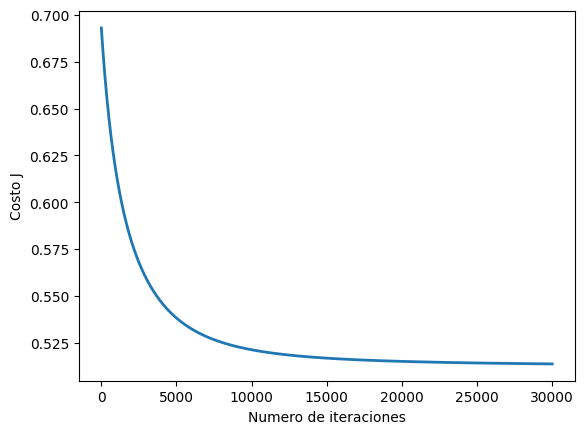

In [118]:
def descensoGradiente(theta, X, y, alpha, num_iters):

    m = y.shape[0]

    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)

        J_history.append(calcularCosto(theta, X, y))
    return theta, J_history

    alpha = 0.003
num_iters = 30000


theta = np.zeros(X_train_norm.shape[1])
theta, J_history = descensoGradiente(theta, X_train_norm, y_train, alpha, num_iters)


pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

print('Costo final después de la optimización:', J_history[-1])
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

In [121]:
def predecir(theta, X):

    probabilidades = sigmoid(X.dot(theta))

    clases_predichas = (probabilidades >= 0.5).astype(int)
    return clases_predichas

def evaluar_predicciones(theta, X, y):

    clases_predichas = predecir(theta, X)

    precision = np.mean(clases_predichas == y) * 100

    correctas = np.sum(clases_predichas == y)
    incorrectas = np.sum(clases_predichas != y)
    return precision, correctas, incorrectas


precision, correctas, incorrectas = evaluar_predicciones(theta, X_test_norm, y_test)

incorrectas_porcentaje = 100 - precision


print("Precisión de las predicciones:", precision, "%")
print("Porcentaje de predicciones incorrectas:", incorrectas_porcentaje, "%")
print("Número de predicciones correctas:", correctas)
print("Número de predicciones incorrectas:", incorrectas)

Precisión de las predicciones: 75.9798149705635 %
Porcentaje de predicciones incorrectas: 24.020185029436504 %
Número de predicciones correctas: 18068
Número de predicciones incorrectas: 5712
